<a href="https://colab.research.google.com/github/UendiMagilaj/ComputerVision-Exercises/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

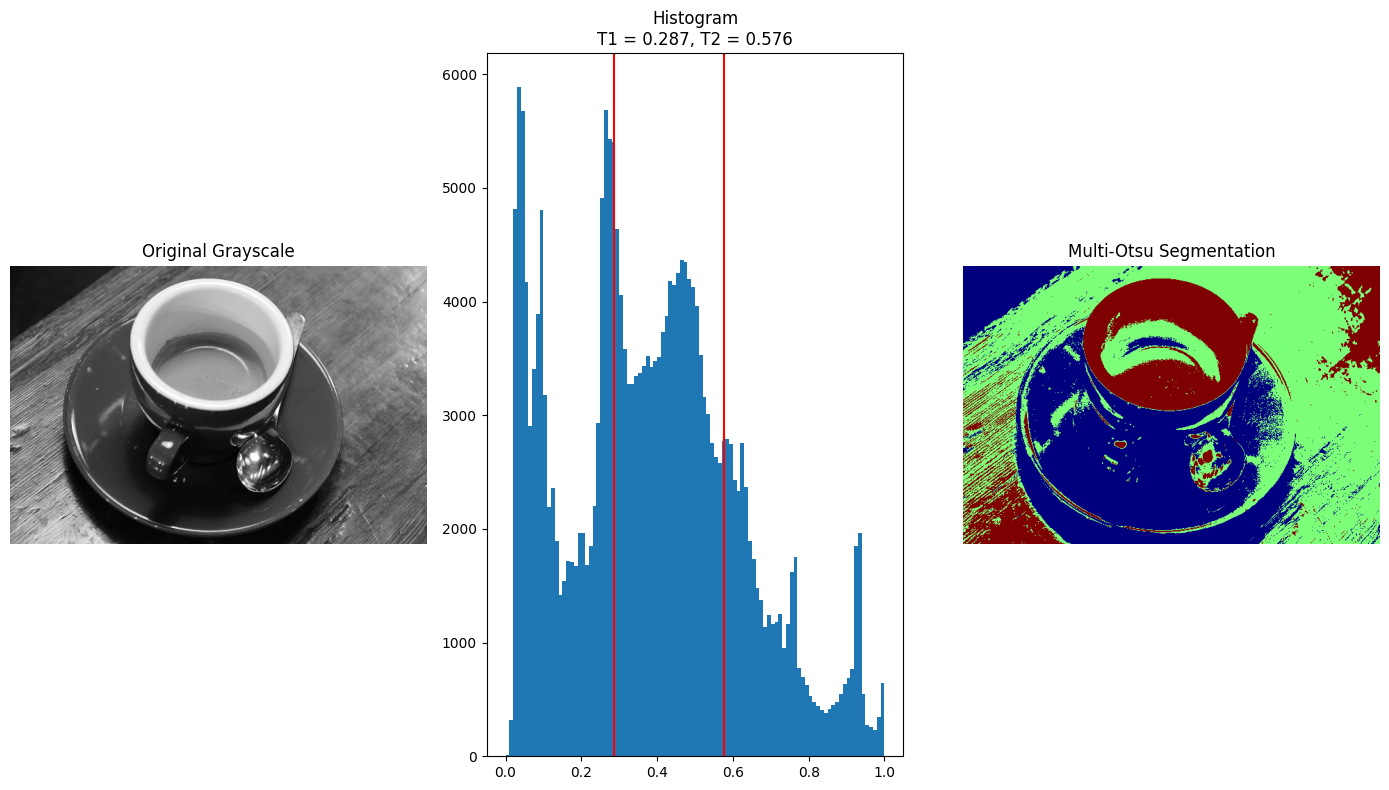

In [9]:
import skimage as sk
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu
from skimage.color import rgb2gray
from skimage import img_as_float

from skimage.filters import threshold_multiotsu

I_color = img_as_float(sk.data.coffee())
I_gray = rgb2gray(I_color)

thresholds = threshold_multiotsu(I_gray)
regions = np.digitize(I_gray, bins=thresholds)

# Flatten grayscale image for histogram
flat_data = I_gray.flatten()

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Original grayscale image
ax[0].imshow(I_gray, cmap='gray')
ax[0].set_title('Original Grayscale')
ax[0].axis('off')

# Histogram with thresholds
ax[1].hist(flat_data, bins=100, range=[0, flat_data.max()])
ax[1].set_title('Histogram\nT1 = {:.3f}, T2 = {:.3f}'.format(thresholds[0], thresholds[1]))
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Segmentation result
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu Segmentation')
ax[2].axis('off')

plt.tight_layout()
plt.show()

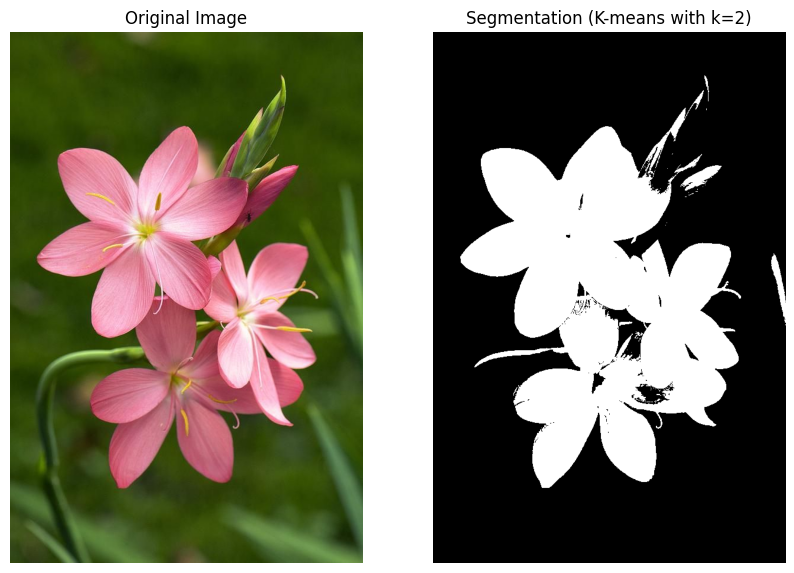

In [19]:
#Task 2
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np


I= imread("flower.jpg")
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2]))

v_I.shape
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1]))
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

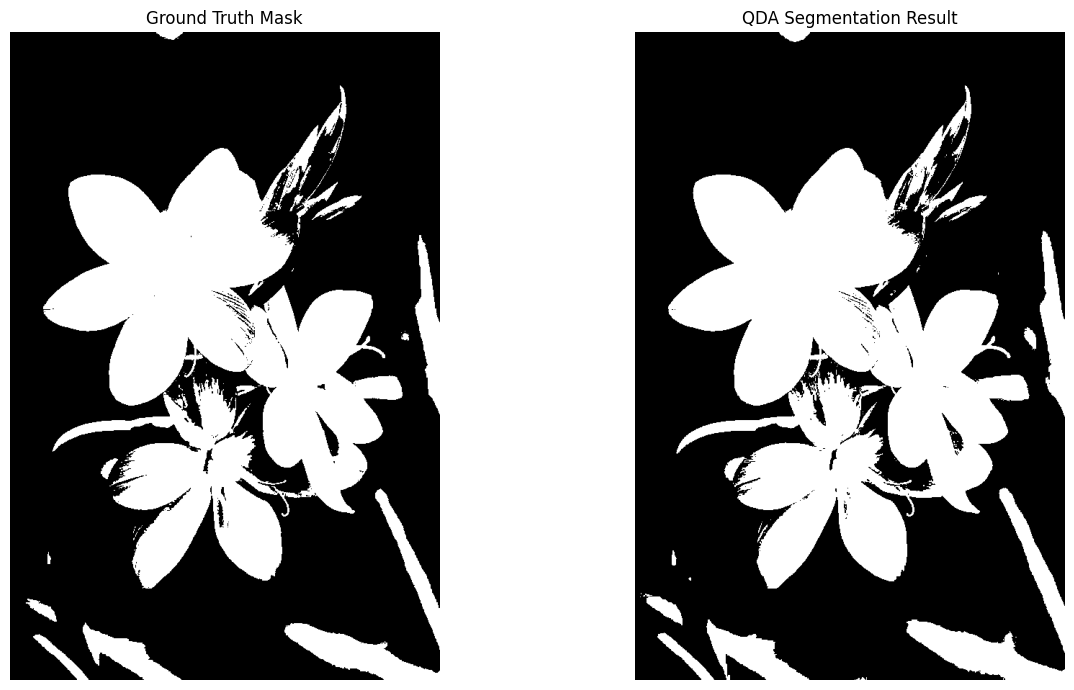

QDA Segmentation: TPR=1.0000, FPR=0.0282, DSC=0.9709


In [21]:
#Task 3
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

I_color = img_as_float(imread("flower.jpg"))
I_gray = rgb2gray(I_color)

I_train = I_gray.copy()
I_train_GT = np.zeros_like(I_gray, dtype=np.uint8)
I_train_GT[I_gray > 0.4] = 1

v_I_train = I_train.reshape(-1, 1)
v_train_GT = I_train_GT.reshape(-1, 1).astype(bool)


qda_model = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_model.fit(v_I_train, v_train_GT.ravel())
v_qda = qda_model.predict(v_I_train)
I_qda = v_qda.reshape(I_gray.shape).astype(np.uint8)


v_test_GT = I_train_GT.reshape(-1, 1).astype(bool)
CM_qda = confusion_matrix(v_test_GT, np.array(v_qda).astype(bool))
tn, fp, fn, tp = CM_qda.ravel()
TPR_qda = tp / (tp + fn) if (tp + fn) > 0 else 0
FPR_qda = fp / (fp + tn) if (fp + tn) > 0 else 0
DSC_qda = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(I_train_GT, cmap='gray')
ax[0].set_title('Ground Truth Mask')
ax[0].axis('off')

ax[1].imshow(I_qda, cmap='gray')
ax[1].set_title('QDA Segmentation Result')
ax[1].axis('off')

plt.tight_layout()
plt.show()

print('QDA Segmentation: TPR={:.4f}, FPR={:.4f}, DSC={:.4f}'.format(TPR_qda, FPR_qda, DSC_qda))

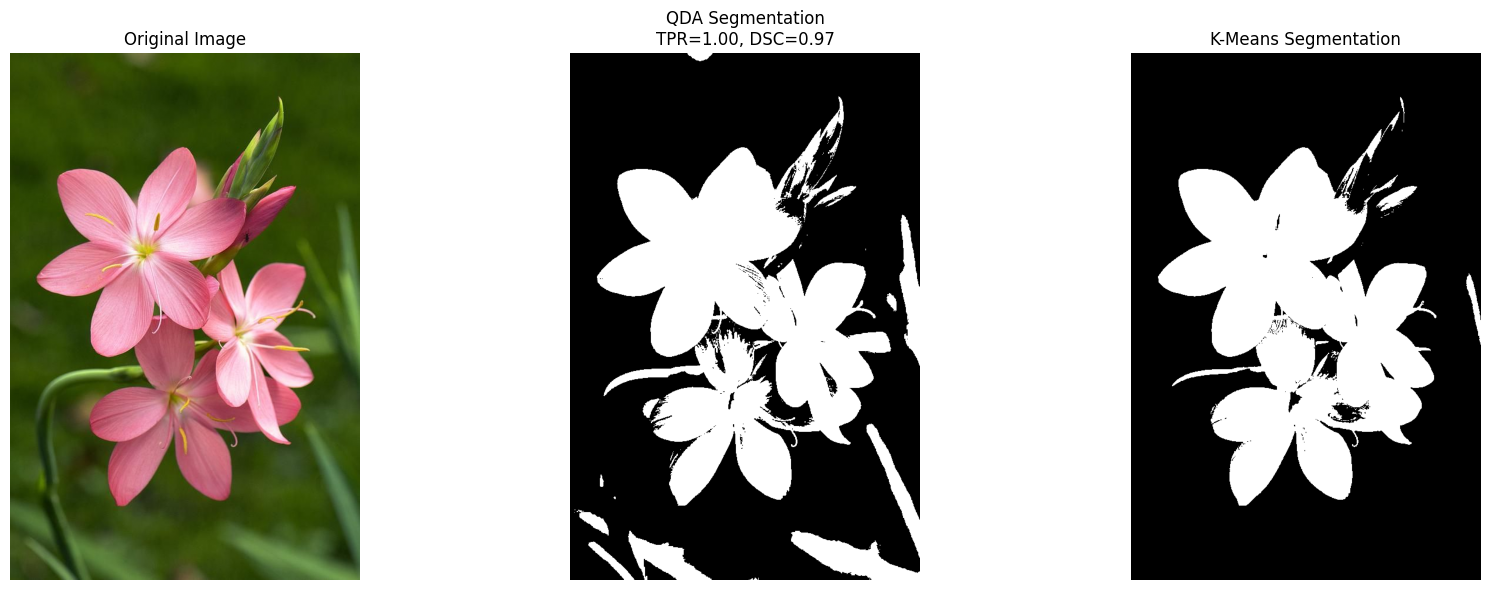

In [22]:
#Task 4
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import img_as_float
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

I_color = imread("flower.jpg")
I_color = img_as_float(I_color)
I_gray = rgb2gray(I_color)

I_train_GT = np.zeros_like(I_gray, dtype=np.uint8)
I_train_GT[I_gray > 0.4] = 1

v_I_train = I_gray.reshape(-1, 1)
v_train_GT = I_train_GT.ravel().astype(bool)

qda_model = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_model.fit(v_I_train, v_train_GT)
v_qda = qda_model.predict(v_I_train)
I_qda = v_qda.reshape(I_gray.shape).astype(np.uint8)

tn, fp, fn, tp = confusion_matrix(I_train_GT.ravel(), I_qda.ravel()).ravel()
TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
DSC = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

v_I_color = I_color.reshape(-1, I_color.shape[2])
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
v_kmeans = kmeans.fit_predict(v_I_color)
I_kmeans = v_kmeans.reshape(I_color.shape[0], I_color.shape[1])

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(I_color)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(I_qda, cmap='gray')
axs[1].set_title(f"QDA Segmentation\nTPR={TPR:.2f}, DSC={DSC:.2f}")
axs[1].axis('off')

axs[2].imshow(I_kmeans, cmap='gray')
axs[2].set_title("K-Means Segmentation")
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [24]:
#We can see that the QDA method is more accurate